In [1]:
import csv

In [2]:
import csv

with open('titanic.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    # set the counter
    female_survive = 0
    male_survive = 0
    female_no_survive = 0
    male_no_survive = 0
    # iterate over rows
    for row in csv_reader:
        # if passenger is female and if she survived, increase the counter
        if row[1] == '1' and row[4] == 'female':
            female_survive += 1
        elif row[1] == '1' and row[4] == 'male':
            male_survive += 1
        elif row[1] == '0' and row[4] == 'female':
            female_no_survive += 1
        elif row[1] == '0' and row[4] == 'male':
            male_no_survive += 1
    print(female_survive)

233


In [3]:
"""
Questions:
1. Average age of a male passenger?
2. How many died who were under the age of 18?
3. Average price of fare paid by survivors? Non-survivors?
4. Do sibilings of survivors also survive?
5. Most common last name?
6. Correlation between port of embarkation and survival?
7. Amount of family affect patriarch survival?
8. Of women above the age of 
"""

'\nQuestions:\n1. Average age of a male passenger?\n2. How many died who were under the age of 18?\n3. Average price of fare paid by survivors? Non-survivors?\n4. Do sibilings of survivors also survive?\n5. Most common last name?\n6. Correlation between port of embarkation and survival?\n7. Amount of family affect patriarch survival?\n8. Of women above the age of \n'

In [4]:
import pandas as pd 

In [5]:
df = pd.read_csv('titanic.csv')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
females = df[df['Sex'] == 'female']

In [8]:
females = females['Survived'].value_counts().to_dict()

In [9]:
males = df[df['Sex'] == 'male']
males = males['Survived'].value_counts().to_dict()

In [10]:
# show the percentages of survival across male and female, using crosstab to make a table
pd.crosstab(df['Sex'], df['Survived'], normalize='index')

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


In [11]:
pd.crosstab(df['Sex'], df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [12]:
81 / (81+233)

0.25796178343949044

In [13]:
# figure out how to use groupby
df.groupby(['Sex']['Survived']).value_counts()

TypeError: list indices must be integers or slices, not str

In [14]:
pd.crosstab(df['Survived'], df['Sex'], normalize='index')

Sex,female,male
Survived,,
0,0.147541,0.852459
1,0.681287,0.318713


In [15]:
round(81/(468+81), 2)

0.15

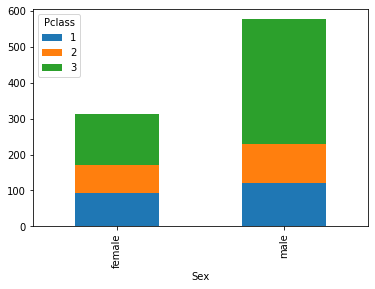

In [16]:
# Stack plot
df.groupby(['Sex'])['Pclass'].value_counts().unstack().plot(kind='bar', stacked=True)

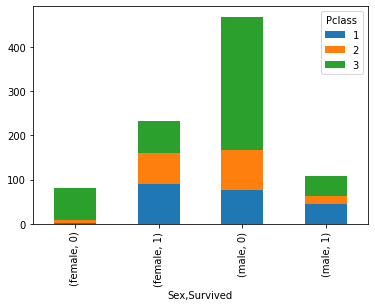

In [17]:
# breakdown of survival by male and female, and by passenger class
df.groupby(['Sex', 'Survived'])['Pclass'].value_counts().unstack().plot(kind='bar', stacked=True)

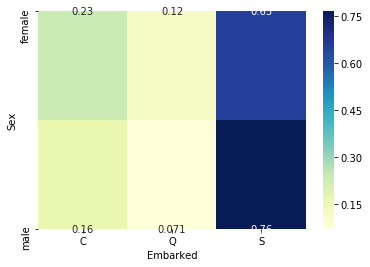

In [18]:
# how to represent the above cross tab in percen
import seaborn as sns
## Look in Pandas_Titanic for all details!!1
sns.heatmap(pd.crosstab(df['Sex'], df['Embarked'], normalize='index'), cmap="YlGnBu", annot=True)

In [19]:
# Combining dataframes
adf = pd.DataFrame(data={'x1': ['A', 'B', 'C'], 'x2': [1,2,3]})

In [20]:
adf

,x1,x2
0,A,1
1,B,2
2,C,3


In [21]:
bdf = pd.DataFrame(data={'x1': ['A', 'B', 'D'], 'x3': ['T', 'F', 'T']})

In [22]:
bdf

,x1,x3
0,A,T
1,B,F
2,D,T


In [23]:
# merge adf and bdf based on adf
pd.merge(adf, bdf, how='left')
# merging extra 

,x1,x2,x3
0,A,1,T
1,B,2,F
2,C,3,NaN


In [24]:
# merge adf and bdf based on bdf
pd.merge(adf, bdf, how='right')

,x1,x2,x3
0,A,1.0,T
1,B,2.0,F
2,D,NaN,T


In [25]:
# merge based on what's common (this is also the default)
pd.merge(adf, bdf, how='inner')

,x1,x2,x3
0,A,1,T
1,B,2,F


In [26]:
# union of merge for adf and bdf
pd.merge(adf, bdf, how='outer')

,x1,x2,x3
0,A,1.0,T
1,B,2.0,F
2,C,3.0,NaN
3,D,NaN,T


In [27]:
# append Pandas dataframe
pd.concat([adf, bdf], sort=True) # row wise concatenation

,x1,x2,x3
0,A,1.0,NaN
1,B,2.0,NaN
2,C,3.0,NaN
0,A,NaN,T
1,B,NaN,F
2,D,NaN,T


In [28]:
pd.concat([adf, bdf], axis=1) # col-wise concatenation

,x1,x2,x1,x3
0,A,1,A,T
1,B,2,B,F
2,C,3,D,T


In [29]:
cdf = pd.DataFrame(data={'x1': ['A', 'B', 'C'], 'x3' : ['T', 'F', 'T']})
# cdf
pd.concat([adf, cdf], axis=1)

pd.concat([adf, cdf], sort=False)

# Correct the indexing after concatination
df = pd.concat([adf, cdf], ignore_index=True)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [30]:
df

,x1,x2,x3
0,A,1.0,NaN
1,B,2.0,NaN
2,C,3.0,NaN
3,A,NaN,T
4,B,NaN,F
5,C,NaN,T


In [31]:
# When two data-frames have exactly the same columns
df = pd.DataFrame([[1, 2], [3, 4]], columns = ['a','b'])
df2 = pd.DataFrame([[5, 6], [7, 8]], columns = ['a','b'])

df = df.append(df2, ignore_index=True)
df

,a,b
0,1,2
1,3,4
2,5,6
3,7,8


In [32]:
# Reshape Pandas data-frame with Melt
data = {'weekday': ["Monday", "Tuesday", "Wednesday",
         "Thursday", "Friday", "Saturday", "Sunday"],
        'Person 1': [12, 6, 5, 8, 11, 6, 4],
        'Person 2': [10, 6, 11, 5, 8, 9, 12],
        'Person 3': [8, 5, 7, 3, 7, 11, 15]}
df = pd.DataFrame(data, columns=['weekday',
        'Person 1', 'Person 2', 'Person 3'])
df                     

,weekday,Person 1,Person 2,Person 3
0,Monday,12,10,8
1,Tuesday,6,6,5
2,Wednesday,5,11,7
3,Thursday,8,5,3
4,Friday,11,8,7
5,Saturday,6,9,11
6,Sunday,4,12,15


In [33]:
# Reshape Pandas Data With Melt
# another representation
melted = pd.melt(df, id_vars=["weekday"],
                 var_name="Person", value_name="Score")

melted  

,weekday,Person,Score
0,Monday,Person 1,12
1,Tuesday,Person 1,6
2,Wednesday,Person 1,5
3,Thursday,Person 1,8
4,Friday,Person 1,11
5,Saturday,Person 1,6
6,Sunday,Person 1,4
7,Monday,Person 2,10
8,Tuesday,Person 2,6
9,Wednesday,Person 2,11


In [34]:
# slicing dataframe based on largest value for a specific column
import numpy as np

df = pd.DataFrame({'a': [1, 10, 8, 11, -1], 'b': list('abcde'), 'c': [1.0, 2.0, np.nan, 3.0, 40]})
df.nlargest(3, 'a')

,a,b,c
3,11,d,3.0
1,10,b,2.0
2,8,c,NaN


In [35]:
# Quiz Questions
# 1. how many not Nan values for the age of female passengers in C
# 2. how many not Nan values exist for the age of male passengers in C
df = pd.read_csv('titanic.csv')
# not_nan_f = 0
females_in_c = df[(df['Embarked'] == 'C') & (df['Sex'] == 'female') & (np.isnan(df['Age']) == False)]

In [36]:
len(females_in_c) # not Nan values for the age of female passengers in C

61

In [37]:
males_in_c_nan = df[(df['Embarked'] == 'C') & (df['Sex'] == 'male') & (np.isnan(df['Age']) == False)]

In [38]:
len(males_in_c_nan) # not Nan values exist for the age of male passengers in C

69

In [39]:
# Why we got 30.81 for the average age (avg for females is 28.34, avg age for males is 32.99)?
# the reason why the average age of passengers who departed from C is greater 
# than the average age of females who departed from C is because the average age of males who departed
# from c is greater, and there are more values for that average. Therefore, when the ages of all passengers who
# embarked from C is calculated find the mean, it goes a little towards the male average age, because they are
# overrepresented in the data sample.
avg =((28.34*61) + (32.99*69))/(61+69)
avg

30.808076923076925

In [40]:
males_in_c_nan = df[(df['Embarked'] == 'C') & (df['Sex'] == 'male') & (df['Age'] >= 0)]

In [41]:
males_in_c_all =  df[(df['Embarked'] == 'C') & (df['Sex'] == 'male')]

In [42]:
males_in_c_not_nan = len(males_in_c_all) - len(males_in_c_nan)

In [43]:
males_in_c_not_nan

26

In [44]:
males_in_c_nan

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
57,58,0,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.2292,NaN,C
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
817,818,0,2,"Mallet, Mr. Albert",male,31.0,1,1,S.C./PARIS 2079,37.0042,NaN,C
827,828,1,2,"Mallet, Master. Andre",male,1.0,0,2,S.C./PARIS 2079,37.0042,NaN,C
843,844,0,3,"Lemberopolous, Mr. Peter L",male,34.5,0,0,2683,6.4375,NaN,C
847,848,0,3,"Markoff, Mr. Marin",male,35.0,0,0,349213,7.8958,NaN,C


In [45]:
males_in_c_nan

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
57,58,0,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.2292,NaN,C
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
817,818,0,2,"Mallet, Mr. Albert",male,31.0,1,1,S.C./PARIS 2079,37.0042,NaN,C
827,828,1,2,"Mallet, Master. Andre",male,1.0,0,2,S.C./PARIS 2079,37.0042,NaN,C
843,844,0,3,"Lemberopolous, Mr. Peter L",male,34.5,0,0,2683,6.4375,NaN,C
847,848,0,3,"Markoff, Mr. Marin",male,35.0,0,0,349213,7.8958,NaN,C


In [46]:
# Solution to the above question
# percent of passengers who Embarked from C

c_pass = df[df['Embarked'] == 'C']
percent_of_passengers_in_c = (num_c)/len(df)
percent_of_passengers_in_c

NameError: name 'num_c' is not defined

In [47]:
# average age of male survivors
male_survivors = df[(df['Sex'] == 'male') & (df['Survived'] == 1)]
male_survivors['Age'].mean()

def compute_mean(dataset):
    """ Main function that calculates the average value across our data. """
    return sum(dataset)/len(dataset)
df[(df['Survived'] == 1) & (df['Sex'] == 'male')]['Age'].dropna().agg(compute_mean)

27.276021505376345

In [48]:
# compute 75th percentile for fare in titanic
np.percentile(df['Fare'], q=75)

31.0

In [49]:
# how to verify
df['Fare'].describe()  # or
df['Fare'].quantile(.75) # or (continue to next cell)

31.0

In [50]:
# how many passengers paid less than $31
num = len(df[df['Fare'] <= np.percentile(df['Fare'].dropna().values, 75)])

In [51]:
num / len(df)

0.7508417508417509

In [52]:
len(df)

891

In [54]:
passengers = df[(df['Sex'] == 'male') | (df['Sex'] == 'female')]

In [55]:
len(passengers)

891

In [56]:
females = df[df['Sex'] == 'female']
len(females)/len(passengers)

0.35241301907968575

In [57]:
passengers = df[(df['Survived'] == 1) & (df['Fare'] > 100.00)]

In [64]:
df[df['Fare'] > 100]['Survived'].value_counts()

1    39
0    14
Name: Survived, dtype: int64

In [65]:
over_100 = df[df['Fare'] > 100.00]

In [66]:
len(passengers)/len(over_100)

0.7358490566037735

In [67]:
39/53

0.7358490566037735

In [69]:
len(df[df["Fare"] > 100])

53

In [70]:
len(df[(df["Fare"] > 100) & ((df['Survived'] == 1))])

39

In [71]:
len(df[(df["Fare"] > 100) & ((df['Survived'] == 1))])/len(df[df["Fare"] > 100])

0.7358490566037735

In [75]:
dict(df[df['Survived'] == 1]['Sex'].value_counts())

{'female': 233, 'male': 109}

In [76]:
109/(109+233)

0.31871345029239767

In [79]:
pd.crosstab(df['Survived'], df['Sex'])

Sex,female,male
Survived,,
0,81,468
1,233,109


In [80]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
# Given that a passenger is under 30 but over 20 years old, what are the chances they are in first class?
dict(df[(df['Age'] > 20) & (df['Age'] < 30)]['Pclass'].value_counts())[1]/len(df[(df['Age'] > 20) & (df['Age'] < 30)])

0.16585365853658537

In [83]:
34/(34+53+118)

0.16585365853658537

In [89]:
df = pd.read_csv('tennis.txt', delimiter="\t", header=None, names=['Outlook', 'Temp', 'Humidity', 'Wind', 'Decision'])

In [91]:
df

,Outlook,Temp,Humidity,Wind,Decision
1,Sunny,Hot,High,Weak,No
2,Sunny,Hot,High,Strong,No
3,Overcast,Hot,High,Weak,Yes
4,Rain,Mild,High,Weak,Yes
5,Rain,Cool,Normal,Weak,Yes
6,Rain,Cool,Normal,Strong,No
7,Overcast,Cool,Normal,Strong,Yes
8,Sunny,Mild,High,Weak,No
9,Sunny,Cool,Normal,Weak,Yes
10,Rain,Mild,Normal,Weak,Yes


In [105]:
dict(df[df['Wind'] == 'Weak']['Decision'].value_counts())['Yes']/len(df['Wind'])

0.42857142857142855

In [109]:
def condition_prob(c1, condition, c2='Decision'):
    results = {}
    for i in condition:
        # results[i] = dict(df[df[c1] == i][c2].value_counts())['Yes']/
        results[i] = len(df[(df[c1] == i) & (df[c2] == 'Yes')])/len(df[c1] + df[c2])
    return results


In [110]:
condition_prob('Wind', ['Weak', 'Strong'], c2='Decision')

{'Weak': 0.42857142857142855, 'Strong': 0.21428571428571427}

In [111]:
# Startup Club Analysis
df = pd.read_csv('~/Downloads/startup.csv')

In [112]:
df.head()

,name,category_list,funding_total_usd,status,country_code,state_code,city,funding_rounds,Investors,Number_of_Investors,Acquirer,Acquirer_Category,Acquirer_Country,Acquirer_State,Acquirer_City,Acquired_Price,Acquired Currency,county,founded_at,Coordinates
0,H2O.ai,Software,33.600000,operating,USA,CA,Mountain View,4.0,Capital One:20000000|Nexus Venture Partners:33...,11.0,-,-,-,-,-,-,-,Santa Clara,2011,37.399364:-122.079517
1,One Inc.,Mobile,1.150050,operating,USA,CA,San Francisco,3.0,Camp One Ventures:150000|CRV:1000050|General C...,12.0,-,-,-,-,-,-,-,San Francisco,2011,37.727239:-123.032229
2,1000 Corks,Software,0.040000,operating,USA,OR,Lake Oswego,1.0,Start-Up Chile:40000,1.0,-,-,-,-,-,-,-,Clackamas,2008,45.412305:-122.699154
3,1000museums.com,Software,6.795451,operating,USA,MA,Lenox,9.0,Alliance of Angels:1289879.0|Converge Venture ...,7.0,-,-,-,-,-,-,-,Berkshire,2008,42.361228:-73.286788
4,Redox,Health,4.000000,operating,USA,WI,Madison,2.0,.406 Ventures:3530000|DreamIt Ventures:470000|...,6.0,-,-,-,-,-,-,-,Dane,2014,43.087806:-89.430121
